# Nonprobabilistic Principle Component Analysis (PCA)

## Algebra
The goal of pricinple component analysis (PCA) is to determin principle components. It is a technique to reduce feature dimensions, a way to get rid of multicollinearity. For each principle component there is a principle axis described by a **projection vector** $\boldsymbol{u}$. There are two ways to determine these $\boldsymbol{u}$s.

**1. Maximize variance**

**The projected data should have the biggest variance along the principle axes**. Suppose that the orginal observations are described by \{$\boldsymbol{x}_n$\}, the projection direction is defined by a **unit** vector $\boldsymbol{u}$. After projection, variance will be:

$$
\frac{1}{N}\sum_{n=1}^N(\boldsymbol{u}^T\boldsymbol{x}_n - \boldsymbol{u}^T\boldsymbol{\bar{x}})^2 = \boldsymbol{u}^TS\boldsymbol{u}
$$

where $\boldsymbol{\bar{x}} = \frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n$ and S is the original variance $\frac{1}{N}\sum_{n=1}^N(\boldsymbol{x}_n - \boldsymbol{\bar{x}})(\boldsymbol{x}_n - \boldsymbol{\bar{x}})^T $.

$\boldsymbol{u}^TS\boldsymbol{u}$ should be maximized subject to $\boldsymbol{u}^T\boldsymbol{u} = 1$, or in another word, we should maximize:

$$
\boldsymbol{u}^TS\boldsymbol{u} + \lambda(1-\boldsymbol{u}^T\boldsymbol{u})
$$

To set its derivative respect to $\boldsymbol{u}$ to be zero, we could have $\boldsymbol{u}^TS\boldsymbol{u} = \lambda$. Thus $\lambda$ is the eigenvalue of covariance matrix S. The largest value of $\boldsymbol{u}^TS\boldsymbol{u}$ is the largest eigenvalue of S. If more than one, say M,  principle components should be defined, then we should take the largest M eigenvalue of S and their corresponding eigenvectors are the projection axes.

**2. Minimize error**

**The projected data should have the smallest error with respect to the original data**. Suppose there are a complete orthonormal set of D-dimensional basis vectors \{$\boldsymbol{u}_i$\}, $i=1, 2, ..., D$. Then $\boldsymbol{x}_n$ can be expressed as:

$$
\boldsymbol{x}_n = \sum_{i=1}^Da_{ni}\boldsymbol{u}_i = \sum_{i=1}^D(\boldsymbol{x}_n^T\boldsymbol{u}_i)\boldsymbol{u}_i
$$

Now suppose among D dimensions, only M dimensions contribute most, i.e. there are M principle components. Then for other D-M dimensions, all data should **share the same coefficients**:

$$
\boldsymbol{\widetilde{x}}_n = \sum_{i=1}^Mz_{ni}\boldsymbol{u}_i + \sum_{i=M+1}^Db_{i}\boldsymbol{u}_i 
$$

Note that $b_i$ are shared by all data. Now we need to minimize the error between $\boldsymbol{\widetilde{x}}_n$ and $\boldsymbol{x}_n$:

$$
J = \frac{1}{N}\sum_{n=1}^N||\boldsymbol{\widetilde{x}}_n - \boldsymbol{x}_n||^2
$$

To set its derivatice with respect to $b_j$ as zero:

$$
\sum_{n=1}^N(\boldsymbol{\widetilde{x}}_n - \boldsymbol{x}_n)^T\boldsymbol{u}_j=0 \Rightarrow
\sum_{n=1}^N(b_j - \boldsymbol{x}_n^T\boldsymbol{u}_j) = 0 \Rightarrow
b_j = \boldsymbol{\bar{x}}^T\boldsymbol{u}_j
$$

To set its derivatice with respect to $z_{nj}$ as zero:

$$
(\boldsymbol{\widetilde{x}}_n - \boldsymbol{x}_n)^T\boldsymbol{u}_j=0 \Rightarrow z_{nj} = \boldsymbol{x}_n^T\boldsymbol{u}_j
$$

Then

$$
\boldsymbol{\widetilde{x}}_n - \boldsymbol{x}_n = \sum_{i=M+1}^D((\boldsymbol{\bar{x}}-\boldsymbol{x}_n)^T\boldsymbol{u}_i)\boldsymbol{u}_i
\Rightarrow ||\boldsymbol{\widetilde{x}}_n - \boldsymbol{x}_n||^2
= \sum_{i=M+1}^D(\boldsymbol{\bar{x}}^T\boldsymbol{u}_i-\boldsymbol{x}_n^T\boldsymbol{u}_i)^2
$$

$$
J = \frac{1}{N}\sum_{n=1}^N\sum_{i=M+1}^D(\boldsymbol{\bar{x}}^T\boldsymbol{u}_i-\boldsymbol{x}_n^T\boldsymbol{u}_i)^2
= \sum_{i=M+1}^D\boldsymbol{u}_i^TS\boldsymbol{u}_i
$$

Using Lagrange multiplier similar to the preivous method (maximize variance), we could define $\lambda_i = \boldsymbol{u}_i^TS\boldsymbol{u}_i$ ($\lambda_i$ is the eigenvalues of S). Then $J = \sum_{i=M+1}^D\lambda_i$. To minimize $J$, we just need to pick up the D-M smallest eigenvalues, or we define **the principle space corresponding to the M largest eigenvalues**.

One application of PCA is to visualize high-dimensional data, which makes it easier to find data correlation. The other is a data preprocessing method: *whitening*. Usually we would like the data to have zero mean and unit covariance, in which case **different variables are decorrelated**. To do this, we first write down eigenvector equation:

$$
SU = LU
$$

where S is the covariance matrix; U is a D by D orthogonal matrix with columns given by $\boldsymbol{u}_i$; L is a D by D diagonal matrix with elements $\lambda_i$. If we transform $\boldsymbol{x}_n$ to be $\boldsymbol{y}_n$ in a way:

$$
\boldsymbol{y}_n = L^{-1/2}U^T(\boldsymbol{x}_n - \boldsymbol{\bar{x}})
$$

Then we have:

$$
\frac{1}{N}\sum_{n=1}^N\boldsymbol{y}_n = \frac{1}{N}L^{-1/2}U^T(\sum_{n=1}^N\boldsymbol{x}_n - \sum_{n=1}^N\boldsymbol{\bar{x}}) = 0
$$

$$
\frac{1}{N}\sum_{n=1}^N\boldsymbol{y}_n\boldsymbol{y}_n^T 
= \frac{1}{N}L^{-1/2}U^T(\boldsymbol{x}_n - \boldsymbol{\bar{x}})(\boldsymbol{x}_n - \boldsymbol{\bar{x}})^TUL^{-1/2}
=L^{-1/2}U^TSUL^{-1/2} = L^{-1/2}LL^{-1/2} = I
$$

## Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
NUM_C = 1000
SIGMA = [[4,1],[1,2]]
MU = [1,3]

C = np.random.multivariate_normal(MU, SIGMA, NUM_C)
sigma_fitted = (C - MU).T.dot(C - MU)/NUM_C
l, u = np.linalg.eig(sigma_fitted)
C_projected = (C - MU).dot(u[:,0]).reshape(-1,1).dot(u[:,0].reshape(-1,1).T) + MU

C_whitened = np.diag(l**-0.5).dot(u.T.dot((C-MU).T))

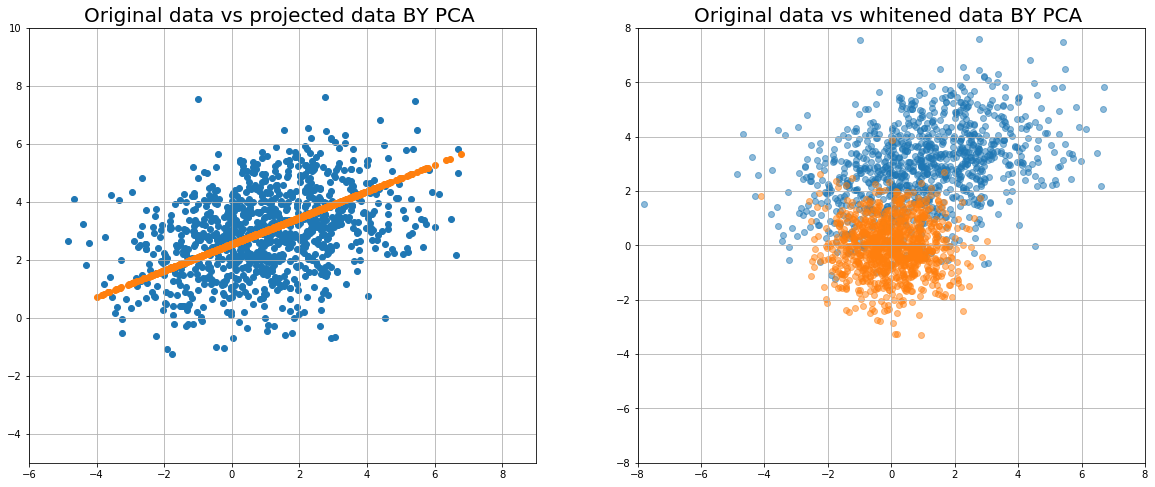

In [2]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

axes[0].scatter(C.T[0], C.T[1])
axes[0].scatter(C_projected.T[0], C_projected.T[1])
axes[0].set_title("Original data vs projected data BY PCA ", fontsize = 20)
axes[0].set_ylim(-5, 10)
axes[0].set_xlim(-6, 9)
axes[0].grid()

axes[1].scatter(C.T[0], C.T[1], alpha = 0.5)
axes[1].scatter(C_whitened[0], C_whitened[1], alpha = 0.5)
axes[1].set_title("Original data vs whitened data BY PCA ", fontsize = 20)
axes[1].set_ylim(-8, 8)
axes[1].set_xlim(-8, 8)
axes[1].grid()